# feature extraction

In [19]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# binary

In [20]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [21]:
df["Cabin_bool"] = df["Cabin"].notnull().astype("int")
print(df.head())
print(df["Cabin_bool"].value_counts())
#null olan değerler 0 yapılır
#null olmayan değerler 1 yapılır

   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked  Cabin_bool
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S           0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C           1
2            3         1       3                             Heikkinen, Miss. Laina  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S           0
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000      1      0            113803 53.100  C123        S           1
4            5         0       3                           Allen, Mr. William Henry    male 35.000      0      0            373450  8.050   NaN        S           0
Cabin_bool

In [22]:
df.groupby("Cabin_bool").agg({"Survived":"mean"})

,Survived
Cabin_bool,
0,0.300
1,0.667


In [23]:
count = [df.loc[df["Cabin_bool"] == 1, "Survived"].sum(),
         df.loc[df["Cabin_bool"] == 0, "Survived"].sum()]
nobs = [df.loc[df["Cabin_bool"] == 1].shape[0],
        df.loc[df["Cabin_bool"] == 0].shape[0]]

test_stat, pvalue = proportions_ztest(count=count, nobs=nobs)
print(f"test statistic: {test_stat:.4f}, p-value: {pvalue:.4f}")

test statistic: 9.4597, p-value: 0.0000


In [24]:
df.loc[((df["SibSp"] + df["Parch"]) > 0),"Is_Alone"] = "no"
df.loc[((df["SibSp"] + df["Parch"]) == 0),"Is_Alone"] = "yes"

In [25]:
df.groupby("Is_Alone").agg({"Survived":"mean"})

,Survived
Is_Alone,
no,0.506
yes,0.304


In [26]:
count = [df.loc[df["Is_Alone"] == "yes", "Survived"].sum(),
         df.loc[df["Is_Alone"] == "no", "Survived"].sum()]
nobs = [df.loc[df["Is_Alone"] == "yes"].shape[0],
        df.loc[df["Is_Alone"] == "no"].shape[0]]

test_stat, pvalue = proportions_ztest(count=count, nobs=nobs)
print(f"test statistic: {test_stat:.4f}, p-value: {pvalue:.4f}")

test statistic: -6.0704, p-value: 0.0000


# numeric

In [27]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [28]:
# aile boyutunu hesapla
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1  

# family_size'a göre hayatta kalma oranını incele
print(df.groupby("Family_Size").agg({"Survived": "mean"}))

             Survived
Family_Size          
1               0.304
2               0.553
3               0.578
4               0.724
5               0.200
6               0.136
7               0.333
8               0.000
11              0.000


# text

In [29]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [30]:
def find_word_count(string):
    words = string.split()
    return len(words)

df["Letter_count"] = df["Name"].str.len()
df["Word_count"] = df["Name"].apply(find_word_count)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Letter_count,Word_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4


In [31]:
# survived ve word_count arasındaki korelasyonu hesapla
correlation_word = df["Word_count"].corr(df["Survived"])
print(f"word_count ile survived arasindaki korelasyon: {correlation_word:.4f}")

# survived ve letter_count arasındaki korelasyonu hesapla
correlation_letter = df["Letter_count"].corr(df["Survived"])
print(f"letter_count ile survived arasindaki korelasyon: {correlation_letter:.4f}")

word_count ile survived arasindaki korelasyon: 0.2765
letter_count ile survived arasindaki korelasyon: 0.3323


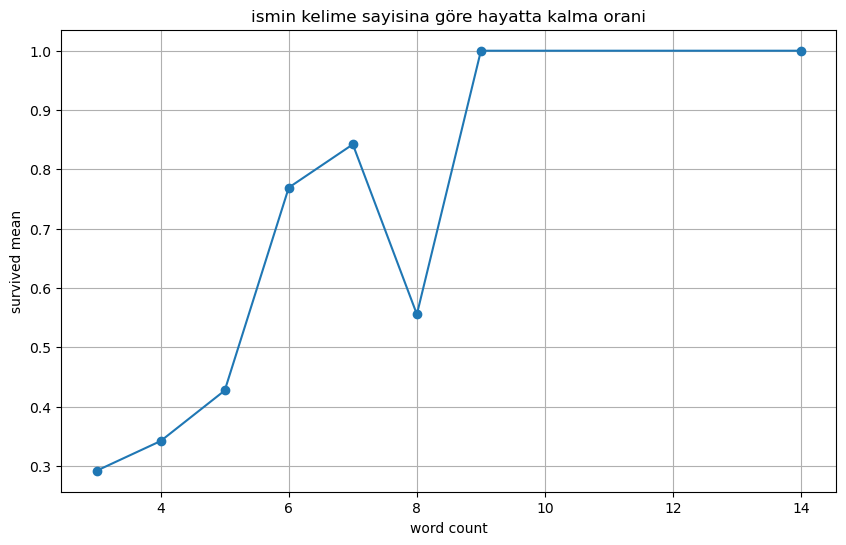

In [32]:
word_count_survival = df.groupby("Word_count").agg({"Survived": "mean"}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(word_count_survival["Word_count"], word_count_survival["Survived"], marker='o', linestyle='-')
plt.title("ismin kelime sayisina göre hayatta kalma orani")
plt.xlabel("word count")
plt.ylabel("survived mean")
plt.grid()
plt.show()

# regex

In [33]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [34]:
# "mr." içeren isimleri bul ve yeni bir sütun ekle
df["Has_Mr"] = df["Name"].str.contains(r"Mr\.", regex=True).astype(int)

# "mrs." içeren isimleri bul ve yeni bir sütun ekle
df["Has_Mrs"] = df["Name"].str.contains(r"Mrs\.", regex=True).astype(int)

# has_mr ve has_mrs'a göre hayatta kalma oranını inceleyelim
print(df.groupby("Has_Mr").agg({"Survived": "mean"}))
print(df.groupby("Has_Mrs").agg({"Survived": "mean"}))


        Survived
Has_Mr          
0          0.698
1          0.157
         Survived
Has_Mrs          
0           0.317
1           0.792
